# Correlación

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
cont = pd.read_csv('https://bit.ly/31B56KB')
cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Contaminacion_SO2  41 non-null     int64  
 1   Temperatura        41 non-null     float64
 2   Fabricas           41 non-null     int64  
 3   Habitantes         41 non-null     int64  
 4   Velocidad_viento   41 non-null     float64
 5   Lluvia             41 non-null     float64
 6   Dias_Lluvia        41 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.4 KB


In [3]:
cont.head()

,Contaminacion_SO2,Temperatura,Fabricas,Habitantes,Velocidad_viento,Lluvia,Dias_Lluvia
0,10,70.3,213,582,6.0,7.05,36
1,13,61.0,91,132,8.2,48.52,100
2,12,56.7,453,716,8.7,20.66,67
3,17,51.9,454,515,9.0,12.95,86
4,56,49.1,412,158,9.0,43.37,127


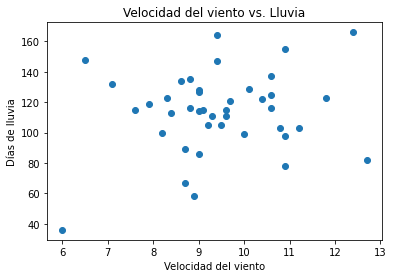

In [4]:
plt.scatter(cont.Velocidad_viento, cont.Dias_Lluvia)
plt.title('Velocidad del viento vs. Lluvia')
plt.xlabel('Velocidad del viento')
plt.ylabel('Días de lluvia')
plt.show()

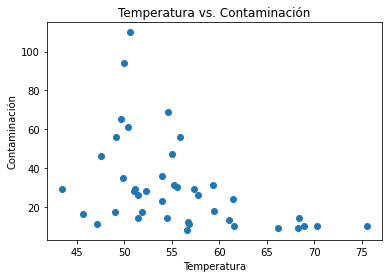

In [12]:
plt.scatter(cont.Temperatura, cont.Contaminacion_SO2)
plt.title('Temperatura vs. Contaminación')
plt.xlabel('Temperatura')
plt.ylabel('Contaminación')
plt.show()

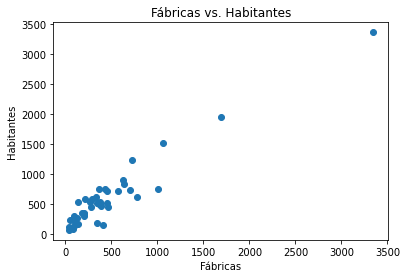

In [13]:
plt.scatter(cont.Fabricas, cont.Habitantes)
plt.title('Fábricas vs. Habitantes')
plt.xlabel('Fábricas')
plt.ylabel('Habitantes')
plt.show()

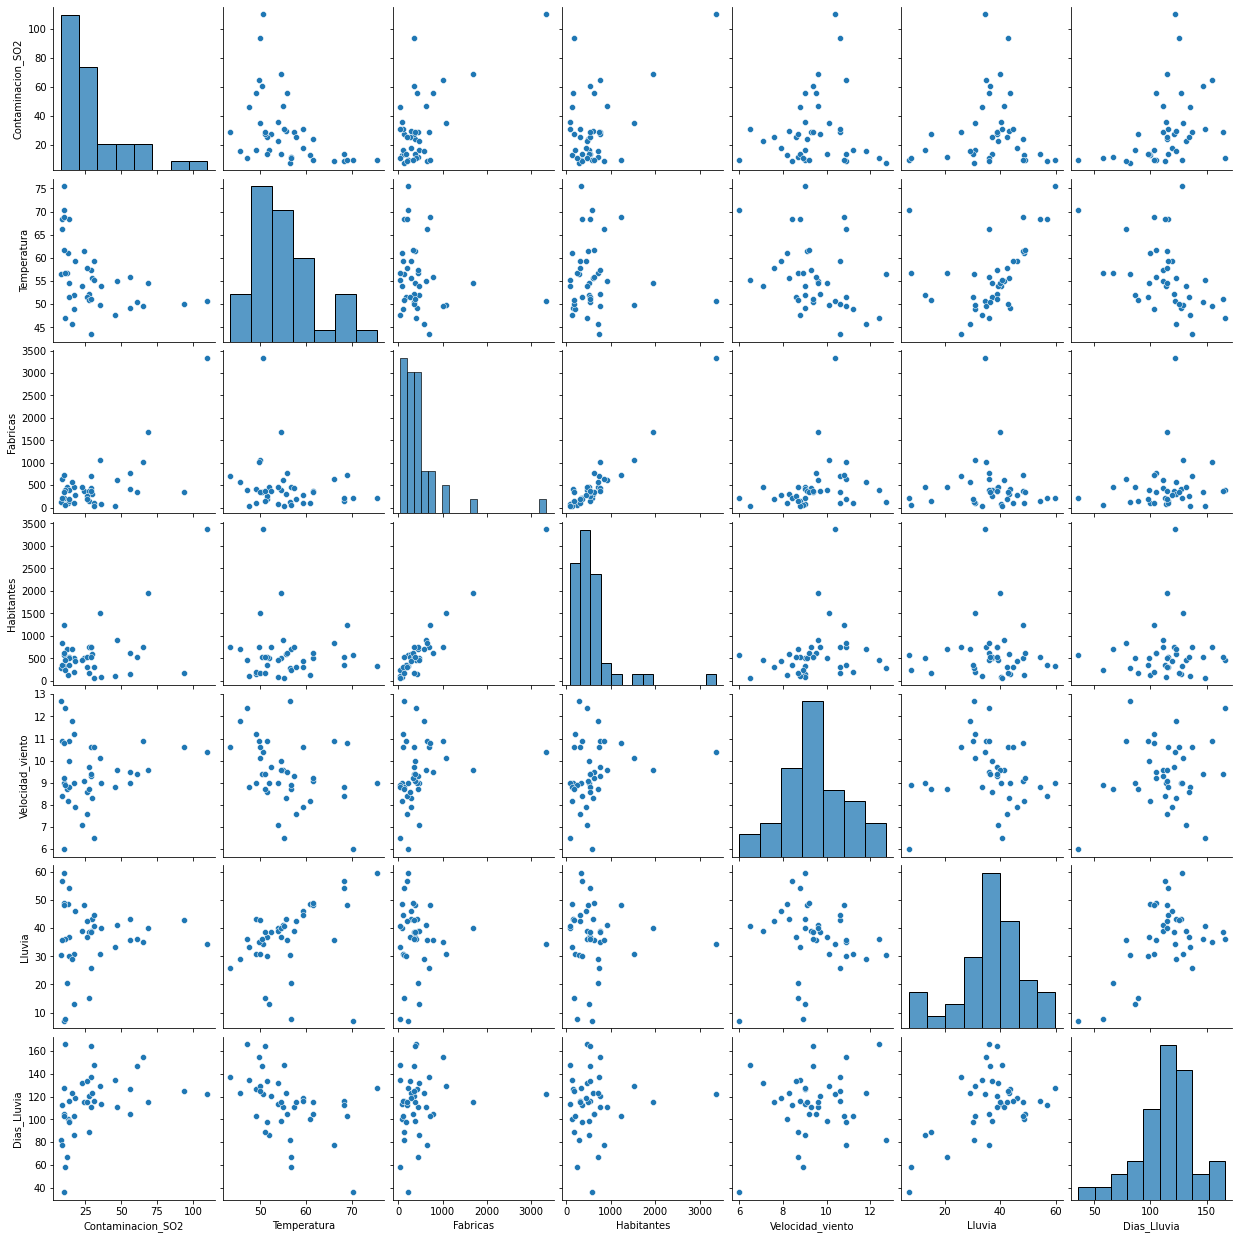

In [15]:
sns.pairplot(cont)
plt.show()

Sin distribución normal: Contaminación, Temperatura, Habitantes, Fábricas

Distribución normal: Velocidad_viento, Lluvia, Dias_Lluvia

## Pruebas de normalidad

In [29]:
data = np.random.normal(0, 1, 100)

### Histrograma

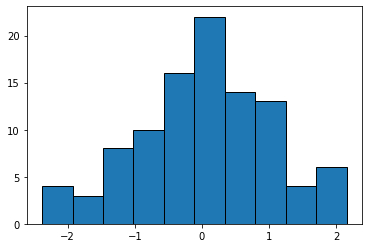

In [31]:
plt.hist(data, edgecolor='black')
plt.show()

### Quantile Quantile Normal

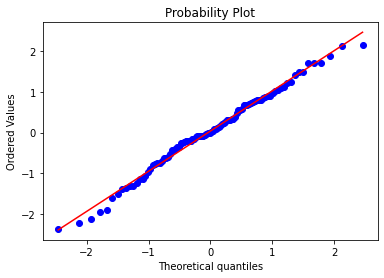

In [32]:
import scipy.stats as stats
import pylab
stats.probplot(data, dist='norm', plot=pylab)
pylab.show()

### Shapiro-Wilks

$p\_value$ debe tener un valor mayor a $0.05$ para considerarse con distribución normal

In [36]:
from scipy.stats import shapiro
estad, p_value = shapiro(data)
print('Estad = %.4f, p_value= %.4f' % (estad, p_value))

Estad = 0.9890, p_value= 0.5857


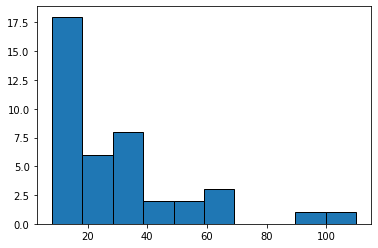

In [34]:
plt.hist(cont.Contaminacion_SO2, edgecolor='black')
plt.show()

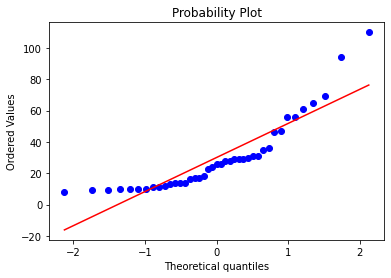

In [35]:
stats.probplot(cont.Contaminacion_SO2, dist='norm', plot=pylab)
pylab.show()

In [37]:
estad, p_value = shapiro(cont.Contaminacion_SO2)
print(f'Estad= {estad}, p_value = {p_value}')

Estad= 0.8116509914398193, p_value = 9.723247785586864e-06


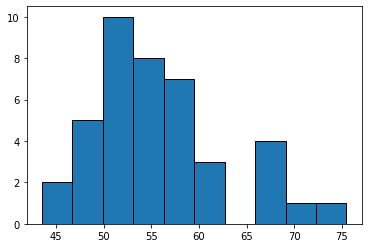

In [38]:
plt.hist(cont.Temperatura, edgecolor='black')
plt.show()

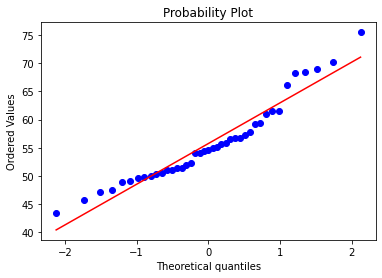

In [39]:
stats.probplot(cont.Temperatura, dist='norm', plot=pylab)
pylab.show()

In [40]:
estad, p_value = shapiro(cont.Temperatura)
print(f'Estad= {estad}, p_value = {p_value}')

Estad= 0.9355422258377075, p_value = 0.022150294855237007


### Heatmap

Necesitamos usar el coeficiente de Spearman porque no todas las variables tienen distribución normal

In [42]:
cont_corr = cont.corr(method='spearman') #correlación
cont_corr

,Contaminacion_SO2,Temperatura,Fabricas,Habitantes,Velocidad_viento,Lluvia,Dias_Lluvia
Contaminacion_SO2,1.000000,-0.538831,0.264051,0.089470,0.047309,-0.002616,0.517709
Temperatura,-0.538831,1.000000,-0.225629,0.031362,-0.398282,0.498650,-0.505730
Fabricas,0.264051,-0.225629,1.000000,0.822997,0.394193,-0.151568,0.145266
Habitantes,0.089470,0.031362,0.822997,1.000000,0.337431,-0.130314,0.010108
Velocidad_viento,0.047309,-0.398282,0.394193,0.337431,1.000000,-0.256605,0.034454
Lluvia,-0.002616,0.498650,-0.151568,-0.130314,-0.256605,1.000000,0.242342
Dias_Lluvia,0.517709,-0.505730,0.145266,0.010108,0.034454,0.242342,1.000000


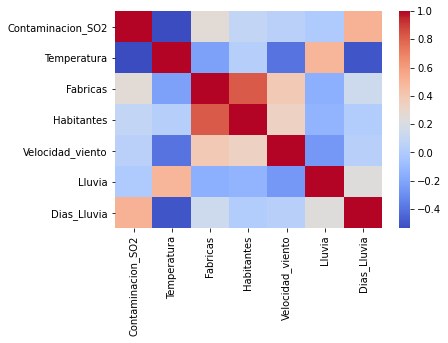

In [47]:
sns.heatmap(cont_corr, cmap='coolwarm', xticklabels=cont_corr.columns, yticklabels=cont_corr.columns)
plt.show()

### Significancia
Medida para verificar que la correlación visible entre dos variables no sea aleatoria. No es muy común pero podría darse el caso. 

$\text{p-unc} > 0.05$ entonces posiblemente haya una correlación al azar. $\text{p-unc}$ -> uncorrected $p$ values

In [49]:
import pingouin as pg
corr = pg.pairwise_corr(cont, method='spearman')
corr.sort_values(by=['p-unc'])[['X', 'Y', 'r', 'p-unc']]

,X,Y,r,p-unc
11,Fabricas,Habitantes,0.822997,4.020507e-11
0,Contaminacion_SO2,Temperatura,-0.538831,2.784226e-04
5,Contaminacion_SO2,Dias_Lluvia,0.517709,5.270914e-04
10,Temperatura,Dias_Lluvia,-0.505730,7.434618e-04
9,Temperatura,Lluvia,0.498650,9.057623e-04
8,Temperatura,Velocidad_viento,-0.398282,9.906609e-03
12,Fabricas,Velocidad_viento,0.394193,1.076594e-02
15,Habitantes,Velocidad_viento,0.337431,3.096515e-02
1,Contaminacion_SO2,Fabricas,0.264051,9.527256e-02
18,Velocidad_viento,Lluvia,-0.256605,1.053381e-01
